In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

# 1. 다나와 데이터 수집 1페이지 크롤링

In [27]:
url = 'https://www.danawa.com/'
driver = webdriver.Chrome('chromedriver')
driver.get(url)
time.sleep(2)

In [28]:
driver.find_element(By.CSS_SELECTOR, '.search__input').send_keys('무선청소기')
driver.find_element(By.CSS_SELECTOR, '.search__submit').click()

In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

## 다나와 검색 웹페이지에서 상품정보 가져오기


In [6]:
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

44

In [7]:
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
title

'삼성전자 비스포크 제트 VS20A956A3'

In [8]:
# 스펙 정보 가져오기
spec_list = prod_items[0].select('div.spec_list')[0].text.replace('\t', "").replace('\n', '')
spec_list

'핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 디지털인버터모터 / 5단계여과 / [기능] 물걸레(별도구매) / 디스플레이표시창 / 자동물공급 / 배터리잔량표시 / 자동먼지비움 / [부가] 먼지통용량: 0.5L / 물통용량: 0.15L / 색상: 미드나잇블루 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm'

In [11]:
# 가격 정보 가져오기
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
price

'458920'

In [10]:
# 1페이지
prod_data = []
for prod_item in prod_items:
    # 공백 ('li.prod_item.product-pot') 제외
    if 'product-pot' in prod_item['class']:
        continue
    try:
        title = prod_items[0].select('p.prod_name > a')[0].text.strip()
        spec_list = prod_items[0].select('div.spec_list')[0].text.replace('\t', "").replace('\n', '')
        price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
        prod_data.append([title, spec_list, price])
    except:
        pass
print(len(prod_data))
print(prod_data)

43
[['삼성전자 비스포크 제트 VS20A956A3', '핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 디지털인버터모터 / 5단계여과 / [기능] 물걸레(별도구매) / 디스플레이표시창 / 자동물공급 / 배터리잔량표시 / 자동먼지비움 / [부가] 먼지통용량: 0.5L / 물통용량: 0.15L / 색상: 미드나잇블루 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm', '458920'], ['삼성전자 비스포크 제트 VS20A956A3', '핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 디지털인버터모터 / 5단계여과 / [기능] 물걸레(별도구매) / 디스플레이표시창 / 자동물공급 / 배터리잔량표시 / 자동먼지비움 / [부가] 먼지통용량: 0.5L / 물통용량: 0.15L / 색상: 미드나잇블루 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm', '458920'], ['삼성전자 비스포크 제트 VS20A956A3', '핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [배터리] 분리형 (1개) / 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 디지털인버터모터 / 5단계여과 / [기능] 물걸레(별도구매) / 디스플레이표시창 / 자동물공급 / 배터리잔량표시 / 자동먼지비움 / [부가] 먼지통용량: 0.5L / 물통용량: 0.15L / 색상: 미드나잇블루 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',

In [25]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_items):
    prod_data = []
    for prod_item in prod_items:
        # 공백 ('li.prod_item.product-pot') 제외
        if 'product-pot' in prod_item['class']:
            continue
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
            spec_list = prod_item.select('div.spec_list')[0].text.replace('\t', "").replace('\n', '')
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
            prod_data.append([title, spec_list, price])
        except:
            pass
    return prod_data

In [15]:
# 상품 정보를 가져오는 함수 테스트
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

43


# 2. 여러 페이지에 걸친 다나와 검색 페이지 크롤링

In [16]:
# 다나와 검색 URL을 만들어 주는 함수
def get_search_page_url(keyword, page):
    return f'https://search.danawa.com/dsearch.php?query={keyword}&originalQuery={keyword}&previousKeyword={keyword}&volumeType=allvs&page={page}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2942&defaultVaTab=719721&tab=goods'

keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

https://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&previousKeyword=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2942&defaultVaTab=719721&tab=goods


In [18]:
import time
from tqdm.notebook import tqdm

In [29]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []
for page in tqdm(range(1, total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 상품정보 추출
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # 추출한 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

  0%|          | 0/10 [00:00<?, ?it/s]

# 3. 수집한 데이터 저장

In [30]:
df = pd.DataFrame(prod_data_total)
df.columns = ['상품명', '스펙 목록', '가격']
df.to_csv('danawa_crawling_result.csv', index=False)

# 4. 데이터 전처리

In [101]:
data = pd.read_csv('danawa_crawling_result.csv')
data

,상품명,스펙 목록,가격
0,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,458920
1,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",48360
2,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1038980
3,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 220W / [구성] 바닥 / 솔...,539990
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63330
...,...,...,...
395,다이슨 V11 컴플리트,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 185AW / [구성] 하이토크 ...,938370
396,DIBEA D18,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 9000Pa / [구성] 바닥 /...,119960
397,캐치웰 CX11 PLUS,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 20000Pa / [구성] 바닥 ...,152150
398,휴대용 청소기 트리플블랙 Z5,"차량용청소기 / 무선 / 흡입력: 5,000Pa / 추가노즐: 틈새, 솔브러쉬, 연...",47710


## 1) 회사명 모델명 정리

In [102]:
company_list = []
product_list = []
for title  in data['상품명']:
    title_info = title.split(" ", 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

## 2) 스펙목록에서 카테고리 사용시간, 흡입력을 추출

In [103]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디스틱청소기',
 '무선형',
 '흡입전용',
 '흡입력: 210W',
 '[구성] 바닥',
 '솔형',
 '틈새',
 '연장툴',
 '청정스테이션',
 '[배터리] 분리형 (1개)',
 '충전시간: 3시간30분',
 '사용시간(개당): 1시간',
 '[성능] 디지털인버터모터',
 '5단계여과',
 '[기능] 물걸레(별도구매)',
 '디스플레이표시창',
 '자동물공급',
 '배터리잔량표시',
 '자동먼지비움',
 '[부가] 먼지통용량: 0.5L',
 '물통용량: 0.15L',
 '색상: 미드나잇블루',
 '무게: 2.5kg',
 '액세서리크래들 ',
 '크기(가로x세로x깊이): 250x930x202mm']

In [104]:
# 카테고리 정보를 추출
category = spec_list[0]
category

'핸디스틱청소기'

In [105]:
# 사용시간, 흡입력이 포함된 원소 추출
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간(개당): 1시간
흡입력: 210W


In [106]:
use_time_value = use_time_spec.split(' ')[1].strip()
use_time_value

'1시간'

In [107]:
suction_value = suction_spec.split(' ')[1].strip()
suction_value

'210W'

In [108]:
# 카테고리, 사용시간, 흡입력 추출
category_list = []
use_time_list = []
suction_list = []
for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    
    # 카테고리 추출
    category = spec_list[0]
    category_list.append(category)
    
    # 사용시간 흡입력 추출
    use_time_value = None
    suction_value = None
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [112]:
print("카테고리 :", len(category_list), category_list[0:5])
print("사용시간 :", len(use_time_list), use_time_list[0:5])
print("흡입력 :", len(suction_list), suction_list[0:5])

카테고리 : 400 ['핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기', '차량용청소기']
사용시간 : 400 ['1시간', '45분', '1시간', '1시간', '30분']
흡입력 : 400 ['210W', '15,000Pa', '220W', '220W', '16,800Pa']


## 3) 무선청소기 사용시간 단위 통일

In [113]:
# 40분 -> 40, 3시간30분 -> 210
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0] # 3시간30분 -> 3
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0] # 3시간30분 -> 30
            else:
                minute = 0 # 1시간 -> 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour) * 60 + int(minute)
    except:
        return None

In [114]:
# 함수 동작 테스트
times = ['40분', '4분', '1시간', '3시간30분', '4시간']
for time in times:
    time_value = convert_time_minute(time)
    print(time, '=', time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [115]:
# 모델별 사용시간을 분단위로 통일
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

400
[60, 45, 60, 60, 30, 35, 60, 60, 60, 25]


## 4) 무선청소기 흡입력 단위 통일

In [118]:
# w 지우고 pa 100을 나눠서 단위를 통일
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace('A', '').replace('W', '')
            result = int(result.replace(',', ''))
        elif 'PA' in value:
            result = value.replace('PA', '')
            result = int(result.replace(',', ''))/100
        else:
            result = None
        return result
    except:
        return None

In [119]:
# 흡입력 단위 통일시키기
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
    
print(len(new_suction_list))
print(new_suction_list[0:10])

400
[210, 150.0, 220, 220, 168.0, None, 200, 200, 210, None]


In [121]:
data['카테고리'] = category_list
data['사용시간'] = new_use_time_list
data['흡입력'] = new_suction_list
data

,상품명,스펙 목록,가격,카테고리,사용시간,흡입력
0,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,458920,핸디스틱청소기,60.0,210.0
1,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",48360,차량용청소기,45.0,150.0
2,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1038980,핸디스틱청소기,60.0,220.0
3,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 220W / [구성] 바닥 / 솔...,539990,핸디스틱청소기,60.0,220.0
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",63330,차량용청소기,30.0,168.0
...,...,...,...,...,...,...
395,다이슨 V11 컴플리트,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 185AW / [구성] 하이토크 ...,938370,핸디스틱청소기,60.0,185.0
396,DIBEA D18,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 9000Pa / [구성] 바닥 /...,119960,핸디스틱청소기,45.0,90.0
397,캐치웰 CX11 PLUS,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 20000Pa / [구성] 바닥 ...,152150,핸디스틱청소기,60.0,200.0
398,휴대용 청소기 트리플블랙 Z5,"차량용청소기 / 무선 / 흡입력: 5,000Pa / 추가노즐: 틈새, 솔브러쉬, 연...",47710,차량용청소기,15.0,50.0


# 5. 전처리 결과를 엑셀로 저장

In [160]:
pd_data = pd.DataFrame({
    '카테고리' : category_list, '회사명' : company_list, '제품' : product_list, '가격' : data['가격'], 
    '사용시간' : new_use_time_list, '흡입력' : new_suction_list
})
pd_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,458920,60.0,210.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),48360,45.0,150.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1038980,60.0,220.0
3,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,539990,60.0,220.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),63330,30.0,168.0
...,...,...,...,...,...,...
395,핸디스틱청소기,다이슨,V11 컴플리트,938370,60.0,185.0
396,핸디스틱청소기,DIBEA,D18,119960,45.0,90.0
397,핸디스틱청소기,캐치웰,CX11 PLUS,152150,60.0,200.0
398,차량용청소기,휴대용,청소기 트리플블랙 Z5,47710,15.0,50.0


In [161]:
pd_data.to_csv('result_processing.csv', index=False)

In [162]:
pd_data['카테고리'].value_counts()

핸디스틱청소기             221
차량용청소기               89
물걸레청소기               31
핸디청소기                30
스틱청소기                 7
욕실청소기                 7
침구청소기                 5
핸디/스틱청소기+로봇청소기세트      3
업소용청소기                3
차량용선풍기                1
핸디/스틱청소기+공기청정기세트      1
수영장청소기                1
물걸레청소기+스팀청소기          1
Name: 카테고리, dtype: int64

In [163]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
len(pd_data_final)

221

In [164]:
pd_data_final['가격'].unique() # 가격비교예정을 제거하기 위해 확인

array([ 458920, 1038980,  539990,  160080,  576860,  359980,  439080,
        468880,  157730, 1035520,  719780,  179000,  484930,  619510,
        608010,  639000,  824780,  764810,  565730,  928800, 1320150,
        573150,  695590,  870310, 1108360,  521330,  179200,  665552,
        686350,  716890,  755100,  162470,  792100,  811750,  461080,
         56860,  227020,  591570,  580450,  237290,  123600,  544830,
        718150,  239000,  613350, 1160860,  499500,  948970,  167910,
        795470,  827470,  189000,  329000,  750500,  149000,   93790,
        693780,  278220,  193000,  954900,  942170,  139000,  188090,
        430950,   73790,  980600,  900100,  601590,  379080,  184990,
        104360,   77320,  233150,   38960,  957390,  178100,  366340,
        699390, 1266930,  296100,  327800,  844100,  470370,   89308,
         63760,  394670,  230330,   77800,   41900, 1043820,   47400,
        219890,  184640,  709600,   83650,  144690,  643160,   77130,
        156990,  152

In [165]:
pd_data_final.to_csv('2_result_preprocessing.csv', index=False)

# 6. 가성비 좋은 제품 탐색

In [167]:
pd_data_final.isnull().sum()

카테고리     0
회사명      0
제품       0
가격       0
사용시간    10
흡입력     74
dtype: int64

In [166]:
top_list = pd_data_final.sort_values(['흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
46,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,179000,40.0,400.0
69,핸디스틱청소기,DIBEA,차이슨 ALLNEW29000,239000,48.0,390.0
78,핸디스틱청소기,에어메이드,스마트포스 AMC-3500,189000,45.0,370.0
138,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 (2022년형),179000,40.0,350.0
196,핸디스틱청소기,욜로닉스,로헨 L30,169000,50.0,350.0
...,...,...,...,...,...,...
375,핸디스틱청소기,일렉트로룩스,WELL Q7 WQ71-2ESSF,279810,50.0,NaN
376,핸디스틱청소기,일렉트로룩스,얼티밋홈 900 EFP91835,736070,60.0,NaN
380,핸디스틱청소기,일렉트로룩스,얼티밋홈 900 EFP91814WH,525680,60.0,NaN
385,핸디스틱청소기,아이리스,IC-SLDCP5,39900,30.0,NaN


In [170]:
top_list = pd_data_final.sort_values(['사용시간'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
132,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
352,핸디스틱청소기,샤오미,드리미 V11,460000,90.0,250.0
30,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
131,핸디스틱청소기,샤오미,드리미 T20,296100,70.0,250.0
350,핸디스틱청소기,샤오미,로이드미 X30 프로,248990,70.0,265.0
...,...,...,...,...,...,...
233,핸디스틱청소기,카처,VC4I 코드리스 PLUS,321990,NaN,NaN
306,핸디스틱청소기,비브르,스톰파워 V31000,235000,NaN,310.0
341,핸디스틱청소기,기펠,ZET-10,228000,NaN,NaN
346,핸디스틱청소기,자일렉,ZL-274H,38900,NaN,NaN


In [169]:
top_list = pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
132,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
352,핸디스틱청소기,샤오미,드리미 V11,460000,90.0,250.0
350,핸디스틱청소기,샤오미,로이드미 X30 프로,248990,70.0,265.0
30,핸디스틱청소기,다이슨,Gen5 디텍트™ 컴플리트,1320150,70.0,262.0
131,핸디스틱청소기,샤오미,드리미 T20,296100,70.0,250.0
...,...,...,...,...,...,...
181,핸디스틱청소기,한빛시스템,HV-5088,77130,NaN,NaN
228,핸디스틱청소기,보만,VC7210,48580,NaN,NaN
233,핸디스틱청소기,카처,VC4I 코드리스 PLUS,321990,NaN,NaN
341,핸디스틱청소기,기펠,ZET-10,228000,NaN,NaN


In [171]:
# 평균값 정리
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()
print('가격 평균값', price_mean_value)
print('흡입력 평균값', suction_mean_value)
print('사용시간 평균값', use_time_mean_value)

가격 평균값 375916.33484162897
흡입력 평균값 198.9047619047619
사용시간 평균값 48.12322274881517


In [172]:
# 가성비 좋은 제품 탐색
# 가격이 평균보다 작고 흡입력과 사용시간 평균보다 높으면
condition_data = pd_data_final[(pd_data_final['가격'] <= price_mean_value) & 
              (pd_data_final['흡입력'] >= suction_mean_value) &
             (pd_data_final['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
7,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,359980,60.0,200.0
11,핸디스틱청소기,샤오미,드리미 V10,157730,60.0,220.0
16,핸디스틱청소기,아이닉,NEW i20,179000,50.0,300.0
63,핸디스틱청소기,샤오미,COCLEAN V30,123600,60.0,250.0
96,핸디스틱청소기,원더스리빙,원더스 다이나킹 Z24,139000,50.0,280.0
116,핸디스틱청소기,샤오미,드리미 V9,104360,60.0,200.0
131,핸디스틱청소기,샤오미,드리미 T20,296100,70.0,250.0
132,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
196,핸디스틱청소기,욜로닉스,로헨 L30,169000,50.0,350.0
240,핸디스틱청소기,델로라,V11 파워 300W,84370,70.0,220.0


# 7. 데이터 시각화

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
chart_data = pd_data_final.dropna(axis=0)
len(chart_data)

144

In [175]:
# 흡입력, 사용시간의 최댓값/최소값 정리
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

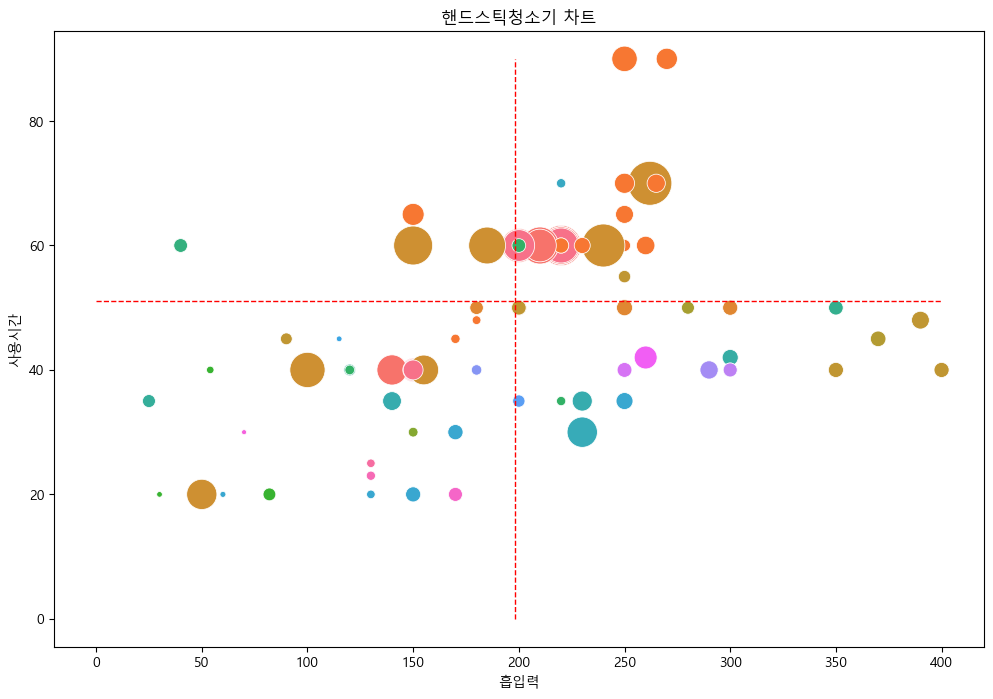

In [177]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title('핸드스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
                data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value], 'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value], 'r--', lw=1)
plt.show()

# 8. 인기 제품의 데이터 시각화

In [178]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

In [180]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

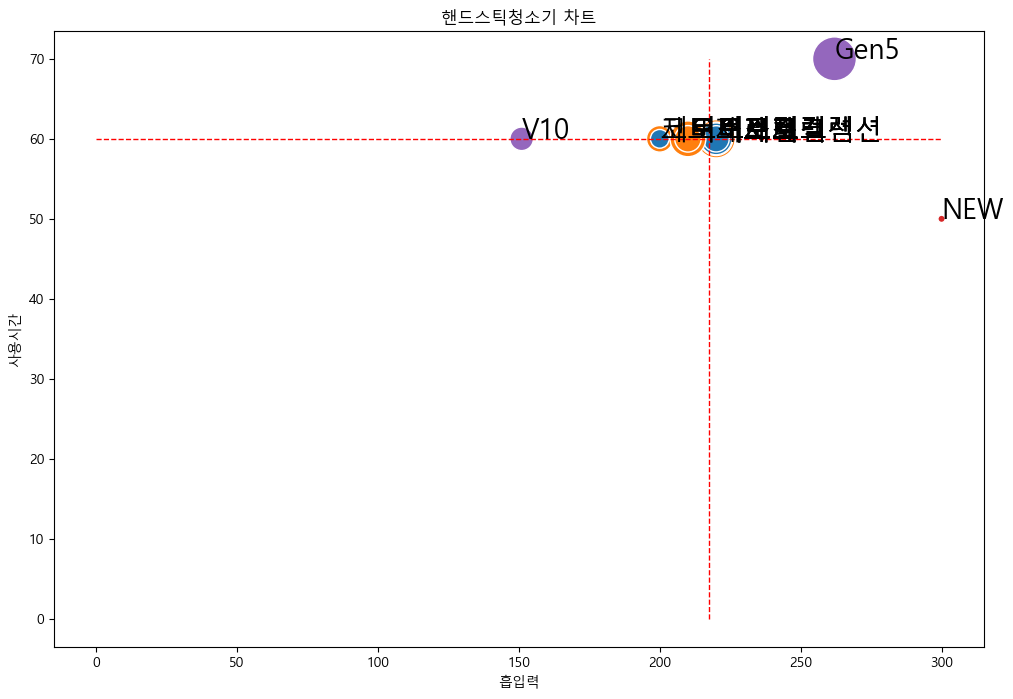

In [181]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title('핸드스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data_selected['회사명'], 
                data = chart_data_selected, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value], 'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value], 'r--', lw=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(" ")[0]
    plt.text(x, y, s, size=20)
plt.show()